In [ ]:
from tardis_dev import datasets
import gzip
import shutil

# https://tardis.dev/ provide excellent crypto data, the first day of
# each month is free so we'll use that

exchange_datasets = {
    "bitmex": "XBTUSD",
    "okex-swap": "BTC-USDT-SWAP",
    "binance-futures": "BTCUSDT",
    "ftx": "BTC-PERP"
}

# Can't run this out of a notebook due to event loops but just run from
# command line in ipython shell instead!

for exchange, dataset in exchange_datasets.items():
    datasets.download(
        exchange=exchange,
        data_types=[
            "incremental_book_L2"
        ],
        from_date="2022-09-01",
        to_date="2022-09-02",
        symbols=[dataset],
    )

    file_name = f"datasets/{exchange}_incremental_book_L2_2022-09-01_{dataset}.csv"

    with gzip.open(f"{file_name}.gz", "rb") as f_in:
        with open(file_name, "wb") as f_out:
            shutil.copyfileobj(f_in, f_out)

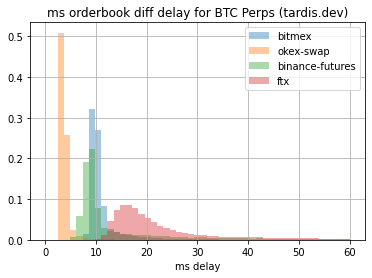

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

nrows = 5e6
data = {}

exchange_datasets = {
    "bitmex": "XBTUSD",
    "okex-swap": "BTC-USDT-SWAP",
    "binance-futures": "BTCUSDT",
    "ftx": "BTC-PERP"
}

for exchange, dataset in exchange_datasets.items():
    file_name = f"datasets/{exchange}_incremental_book_L2_2022-09-01_{dataset}.csv.gz"

    data[exchange] = pd.read_csv(file_name, nrows=nrows)

    data[exchange]["exchange_time"] = pd.to_datetime(data[exchange]["timestamp"], unit="us")
    data[exchange]["received_time"] = pd.to_datetime(data[exchange]["local_timestamp"], unit="us")
    data[exchange]["delay_ms"] = (data[exchange]["local_timestamp"] - data[exchange]["timestamp"]) / 1000

    plt.hist(data[exchange]["delay_ms"], bins=np.linspace(0, 60, 50), density=True, label=exchange, alpha=0.4)

plt.title("ms orderbook diff delay for BTC Perps (tardis.dev)")
plt.xlabel("ms delay")
plt.legend()
plt.grid()